# **Import Libraries**

In [51]:
from google.colab import drive
import random
from zipfile import ZipFile
import shutil
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.optimizers import Adam

# **Setups For Plots**

In [2]:
plt.style.use('dark_background')

# **DataSet**

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **UnZipping Folde**

In [4]:
zip_file=ZipFile('/content/drive/MyDrive/TeethDataSet/Copy of Teeth DataSet.zip','r')
zip_file.extractall('/content/dataset')
zip_file.close()

## **Floders Path**

In [5]:
training_folder_path='/content/dataset/Teeth_Dataset/Training'
val_folder_path='/content/dataset/Teeth_Dataset/Validation'
testing_folder_path = '/content/dataset/Teeth_Dataset/Testing'

## **Keep only categories in testing**

In [6]:
folders_to_keep = ['OT', 'MC', 'CaS', 'CoS', 'OC', 'Gum', 'OLP']

for item in os.listdir(testing_folder_path):
    item_path = os.path.join(testing_folder_path, item)

    if os.path.isdir(item_path) and item not in folders_to_keep:
        print(f"Removing unwanted folder: {item_path}")
        shutil.rmtree(item_path)
    elif os.path.isfile(item_path):
        print(f"Removing unwanted file: {item_path}")
        os.remove(item_path)

print("Unwanted items removed.")

Removing unwanted folder: /content/dataset/Teeth_Dataset/Testing/out
Removing unwanted folder: /content/dataset/Teeth_Dataset/Testing/output
Removing unwanted folder: /content/dataset/Teeth_Dataset/Testing/outputs
Removing unwanted file: /content/dataset/Teeth_Dataset/Testing/output_image.jpg
Unwanted items removed.


## **Training**

In [ ]:
training_images_path=[]

In [ ]:
training_categories=os.listdir(training_folder_path)
training_categories_distribution=[]

In [ ]:
for category in training_categories:
  category_path=os.path.join(training_folder_path,category )
  training_categories_distribution.append(len(os.listdir(category_path)))
  for image in os.listdir(category_path):
    training_images_path.append(os.path.join(category_path,image))

### **Visualization**

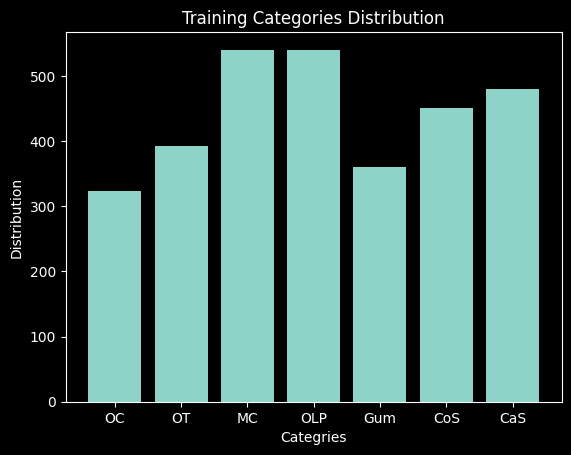

In [ ]:
plt.bar(training_categories,training_categories_distribution)
plt.xlabel('Categries' )
plt.ylabel('Distribution')
plt.title('Training Categories Distribution')
plt.show()

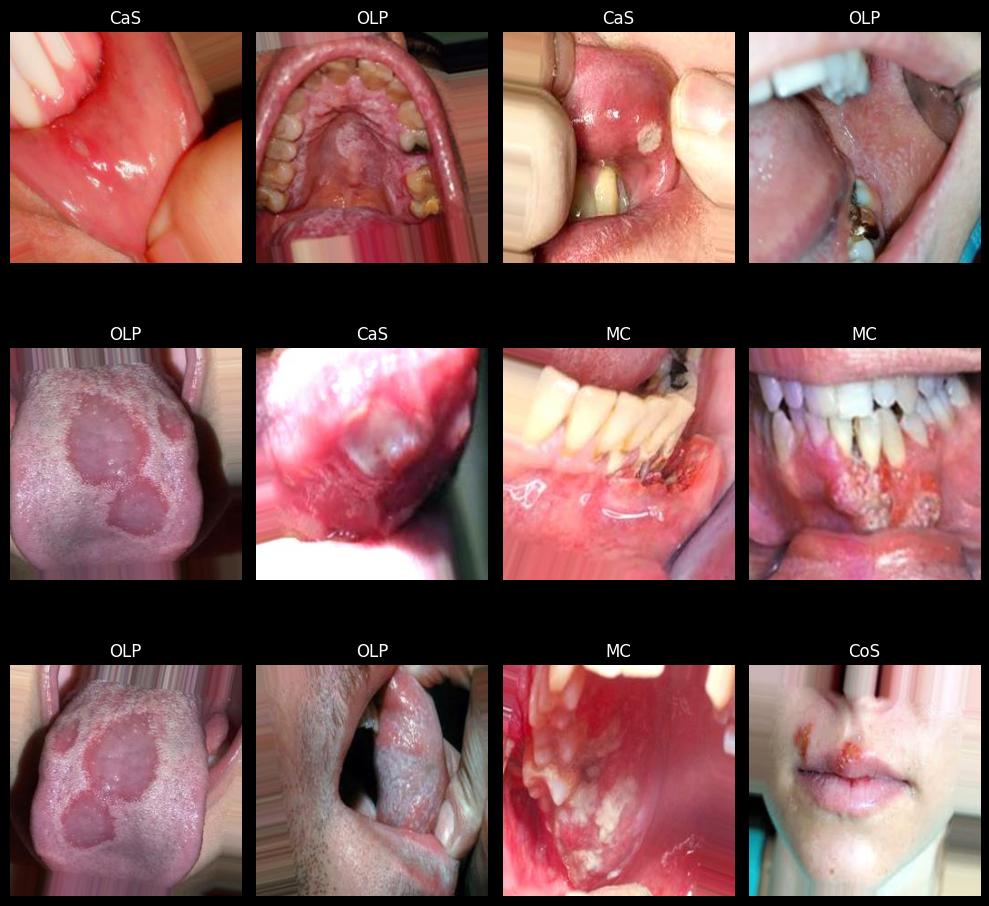

In [ ]:
plt.figure(figsize=(10, 10))
for index in range(12):
  ax=plt.subplot(3,4,index+1)
  i=random.choice(range(len(training_images_path )))
  image=plt.imread(training_images_path[i])
  plt.imshow(image)
  plt.title(training_images_path[i].split('/')[-2])
  plt.axis('off')
plt.tight_layout()
plt.show()

## **Validation**

In [ ]:
val_images_path=[]

In [ ]:
val_categories=os.listdir(val_folder_path)
val_categories_distribution=[]

In [ ]:
for category in val_categories:
  category_path=os.path.join(val_folder_path,category )
  val_categories_distribution.append(len(os.listdir(category_path)))
  for image in os.listdir(category_path):
    val_images_path.append(os.path.join(category_path,image))

### **Visualization**

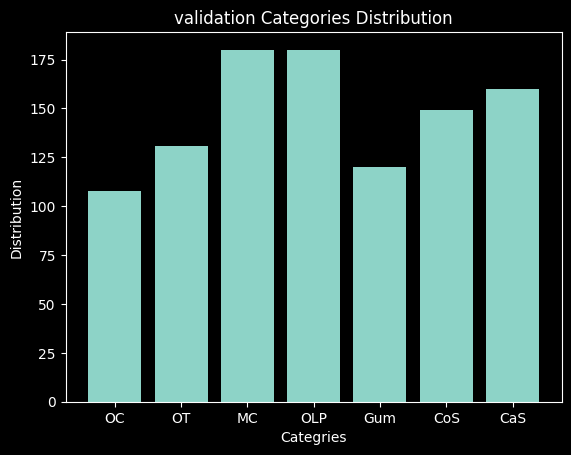

In [ ]:
plt.bar(val_categories,val_categories_distribution)
plt.xlabel('Categries' )
plt.ylabel('Distribution')
plt.title('validation Categories Distribution')
plt.show()

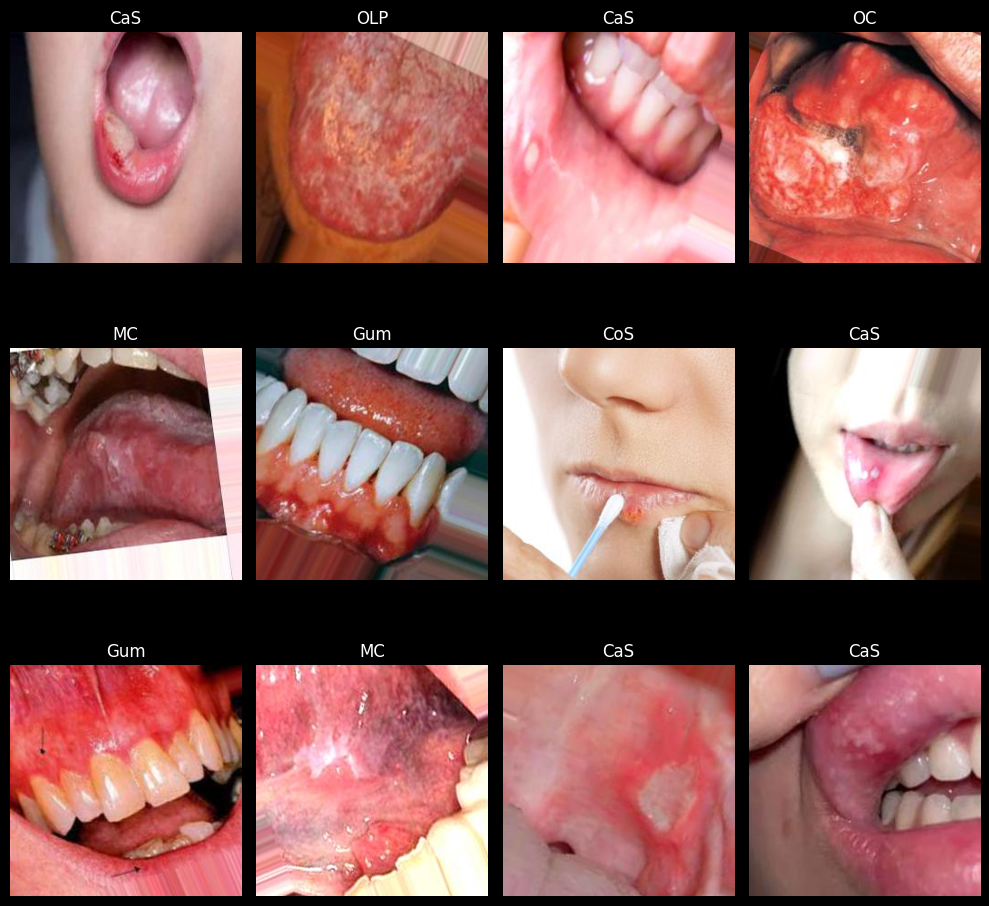

In [ ]:
plt.figure(figsize=(10, 10))
for index in range(12):
  ax=plt.subplot(3,4,index+1)
  i=random.choice(range(len(val_images_path )))
  image=plt.imread(val_images_path[i])
  plt.imshow(image)
  plt.title(val_images_path[i].split('/')[-2])
  plt.axis('off')
plt.tight_layout()
plt.show()

## **Testing**

In [ ]:
testing_images_path =[]

In [ ]:
testing_categories = os.listdir(testing_folder_path)
testing_categories_distribution = []

In [ ]:
for category in testing_categories:
  category_path = os.path.join(testing_folder_path, category)
  if os.path.isdir(category_path):
    testing_categories_distribution.append(len(os.listdir(category_path)))
    for image in os.listdir(category_path):
      testing_images_path.append(os.path.join(category_path, image))

### **Visualization**

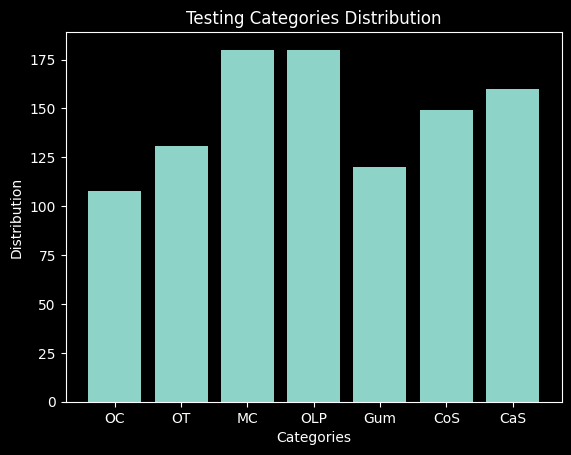

In [ ]:
plt.bar(testing_categories, testing_categories_distribution)
plt.xlabel('Categories')
plt.ylabel('Distribution')
plt.title('Testing Categories Distribution')
plt.show()

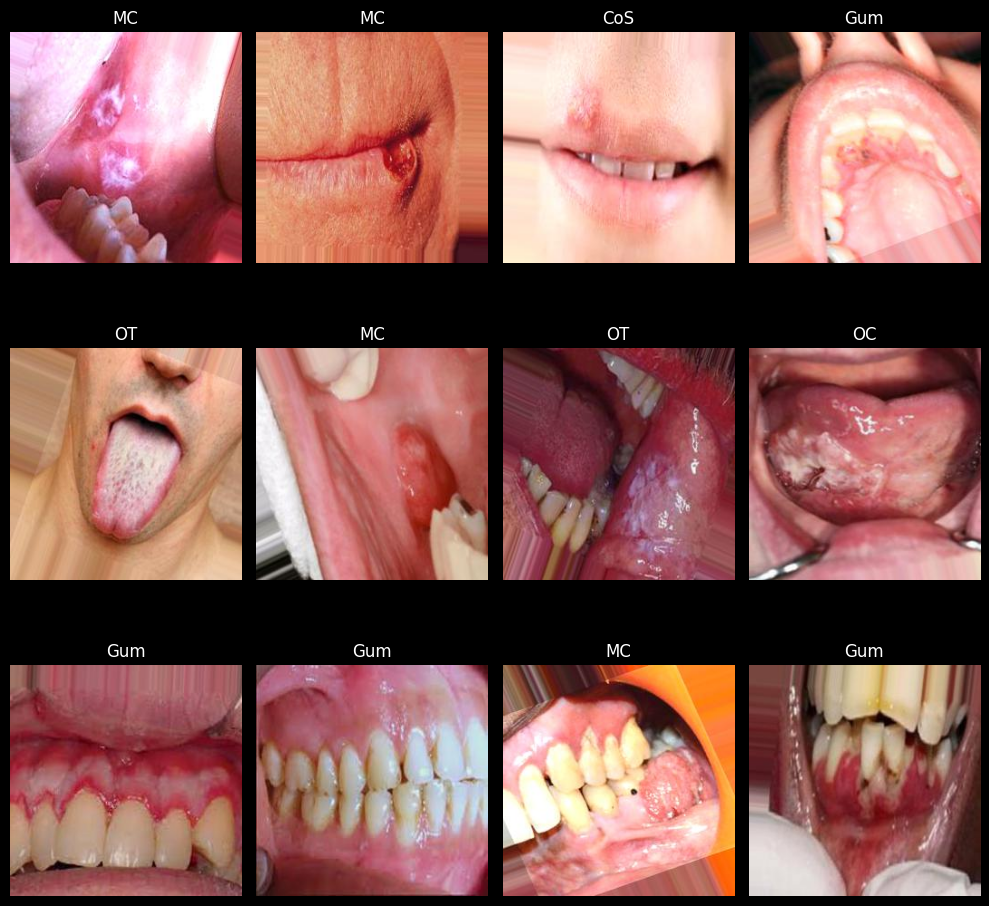

In [ ]:
plt.figure(figsize=(10, 10))
for index in range(12):
  ax = plt.subplot(3, 4, index + 1)
  i = random.choice(range(len(testing_images_path)))
  image = plt.imread(testing_images_path[i])
  plt.imshow(image)
  plt.title(testing_images_path[i].split('/')[-2])
  plt.axis('off')
plt.tight_layout()
plt.show()

# **Augmentation**

## **Training**

In [ ]:
training_generator=ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=20
)

In [ ]:
training_data = training_generator.flow_from_directory(
        training_folder_path,
        target_size=(256, 256),
        batch_size=32,
        shuffle=True,
        class_mode='categorical')

Found 3087 images belonging to 7 classes.


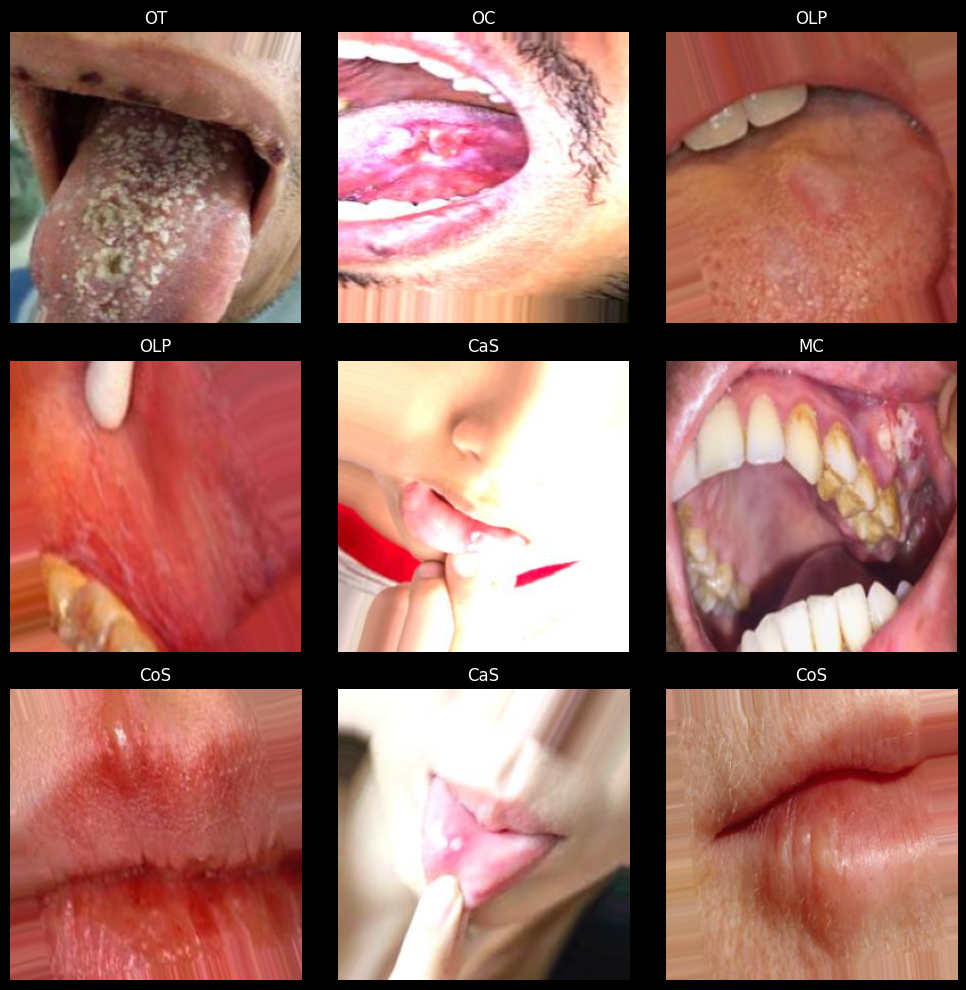

In [ ]:
augmented_images, augmented_labels = next(training_data)

class_names = list(training_data.class_indices.keys())

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    predicted_class_index = np.argmax(augmented_labels[i])
    plt.title(class_names[predicted_class_index])
    plt.axis('off')
plt.tight_layout()
plt.show()

## **Validation**

In [ ]:
val_generator=ImageDataGenerator(rescale=1./255)

In [ ]:
val_data = val_generator.flow_from_directory(
        val_folder_path,
        batch_size=32,
        shuffle=False,
        target_size=(256, 256),
        class_mode='categorical')


Found 1028 images belonging to 7 classes.


## **Testing**

In [ ]:
test_generator=ImageDataGenerator(rescale=1./255)

In [ ]:
test_data= test_generator.flow_from_directory(
    testing_folder_path,
    target_size=(256,256),
    batch_size=32,
    shuffle=False,
    class_mode='categorical'
)

Found 1028 images belonging to 7 classes.


# **Model**

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

cnn = Sequential([
    Conv2D(filters=32, kernel_size=5, strides=3, input_shape=[256, 256, 3], activation='relu'),
    MaxPooling2D(pool_size=2,strides=2),
    Conv2D(filters=64, kernel_size=3, strides=3, activation='relu'),
    MaxPooling2D(pool_size=2,strides=2),

    Conv2D(filters=128, kernel_size=3, strides=1, activation='relu'),


    Conv2D(filters=256, kernel_size=3, strides=1, activation='relu'),

    GlobalAveragePooling2D(),

    Dense(units=100, activation='relu'),
    Dense(units=7, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 84, 84, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 42, 42, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           707 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 416,359 (1.59 MB)

 Trainable params: 416,359 (1.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=cnn.fit(x=training_data,validation_data=val_data,epochs=40)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.1567 - loss: 1.9408

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 66s 612ms/step - accuracy: 0.1569 - loss: 1.9407 - val_accuracy: 0.1770 - val_loss: 1.9176
Epoch 2/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 57s 591ms/step - accuracy: 0.2133 - loss: 1.8996 - val_accuracy: 0.2675 - val_loss: 1.8105
Epoch 3/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 58s 597ms/step - accuracy: 0.2634 - loss: 1.7960 - val_accuracy: 0.3434 - val_loss: 1.6245
Epoch 4/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 58s 598ms/step - accuracy: 0.3531 - loss: 1.6150 - val_accuracy: 0.4212 - val_loss: 1.4997
Epoch 5/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 59s 600ms/step - accuracy: 0.4164 - loss: 1.4917 - val_accuracy: 0.4416 - val_loss: 1.4474
Epoch 6/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 82s 596ms/step - accuracy: 0.4745 - loss: 1.3909 - val_accuracy: 0.5000 - val_loss: 1.3362
Epoch 7/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 59s 601ms/step - accuracy: 0.5330 - loss: 1.2491 - val_accuracy: 0.5467 - val_loss: 1.1908
Epoch 8/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 57s 584ms/step - accuracy: 0.5513 - loss: 1.1975 - val_accuracy: 0.621

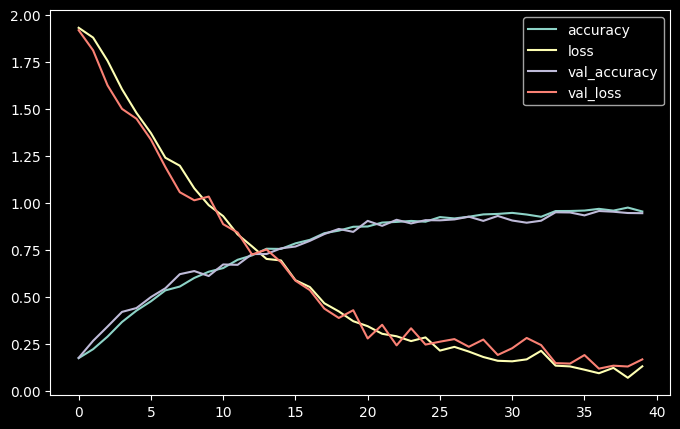

In [ ]:
df= pd.DataFrame(history.history)
df.plot(figsize=(8,5))
plt.show()

In [ ]:
cnn.evaluate(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9245 - loss: 0.2402


[0.19660674035549164, 0.9367704391479492]

In [ ]:
cnn.save('/content/drive/MyDrive/TeethDataSet/model_3.h5')

In [ ]:
y_pred=np.argmax(cnn.predict(test_data),axis=1)
print(y_pred)

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step
[0 0 0 ... 6 6 6]


In [ ]:
print(test_data.classes)

[0 0 0 ... 6 6 6]


In [ ]:
cm =confusion_matrix(test_data.classes,y_pred)

In [ ]:
print(cm)

[[145   2   0   4   4   4   1]
 [  4 141   3   0   0   0   1]
 [  0   0 114   1   3   2   0]
 [  0   0   3 167   7   2   1]
 [  0   0   0   1 104   3   0]
 [  0   0   2   2   6 167   3]
 [  0   1   0   0   3   2 125]]


In [ ]:
print(classification_report(test_data.classes,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       160
           1       0.98      0.95      0.96       149
           2       0.93      0.95      0.94       120
           3       0.95      0.93      0.94       180
           4       0.82      0.96      0.89       108
           5       0.93      0.93      0.93       180
           6       0.95      0.95      0.95       131

    accuracy                           0.94      1028
   macro avg       0.93      0.94      0.94      1028
weighted avg       0.94      0.94      0.94      1028



# **Pretrained Model**

## **Prepear Data**

**Testing**

In [8]:
training_generator=ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=20
)

In [9]:
training_data = training_generator.flow_from_directory(
    training_folder_path,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

Found 3087 images belonging to 7 classes.


**Validation**

In [10]:
val_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [11]:
val_data = val_generator.flow_from_directory(
        val_folder_path,
        batch_size=32,
        shuffle=False,
        target_size=(224, 224),
        class_mode='categorical')


Found 1028 images belonging to 7 classes.


**Testing**

In [12]:
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [13]:
test_data = test_generator.flow_from_directory(
        testing_folder_path,
        batch_size=32,
        shuffle=False,
        target_size=(224, 224),
        class_mode='categorical')


Found 1028 images belonging to 7 classes.


## **Model**

**Load Model**

In [14]:
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

**Unfreeze all layers**

In [15]:
base_model.trainable = True

**freeze part of them**

In [16]:
for layer in base_model.layers[:-50]:
    layer.trainable = False

**Add custome layers**

In [17]:
inputs = layers.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(7, activation='softmax')(x)
model = models.Model(inputs, outputs)

**Compile**

In [18]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Train**

In [19]:
history = model.fit(training_data, validation_data=val_data, epochs=6)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
97/97 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.2835 - loss: 1.9691 - val_accuracy: 0.6693 - val_loss: 1.0537
Epoch 2/6
97/97 ━━━━━━━━━━━━━━━━━━━━ 43s 445ms/step - accuracy: 0.6068 - loss: 1.1125 - val_accuracy: 0.8064 - val_loss: 0.6707
Epoch 3/6
97/97 ━━━━━━━━━━━━━━━━━━━━ 81s 441ms/step - accuracy: 0.7620 - loss: 0.7590 - val_accuracy: 0.8862 - val_loss: 0.4151
Epoch 4/6
97/97 ━━━━━━━━━━━━━━━━━━━━ 45s 462ms/step - accuracy: 0.8328 - loss: 0.5336 - val_accuracy: 0.9387 - val_loss: 0.2457
Epoch 5/6
97/97 ━━━━━━━━━━━━━━━━━━━━ 43s 444ms/step - accuracy: 0.8964 - loss: 0.3363 - val_accuracy: 0.9689 - val_loss: 0.1412
Epoch 6/6
97/97 ━━━━━━━━━━━━━━━━━━━━ 45s 464ms/step - accuracy: 0.9354 - loss: 0.2296 - val_accuracy: 0.9874 - val_loss: 0.0775


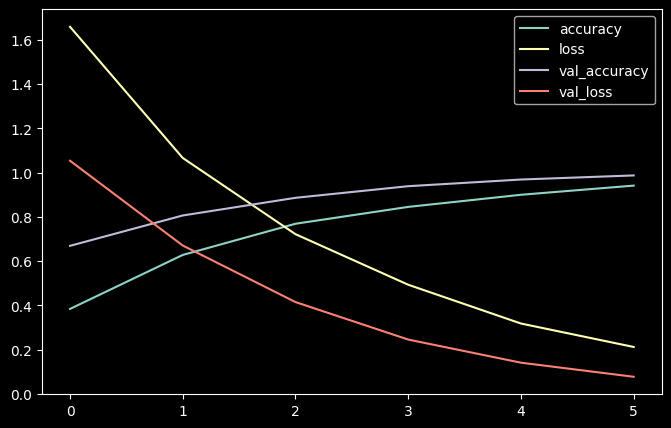

In [21]:
df= pd.DataFrame(history.history)
df.plot(figsize=(8,5))
plt.show()

In [22]:
model.evaluate(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9856 - loss: 0.0540


[0.07610473781824112, 0.9795719981193542]

In [23]:
y_pred=np.argmax(model.predict(test_data),axis=1)
print(y_pred)

33/33 ━━━━━━━━━━━━━━━━━━━━ 48s 941ms/step
[0 0 0 ... 6 6 6]


In [24]:
cm =confusion_matrix(test_data.classes,y_pred)

In [25]:
print(cm)

[[158   0   1   0   1   0   0]
 [  0 149   0   0   0   0   0]
 [  0   0 119   0   0   1   0]
 [  0   1   2 173   3   0   1]
 [  1   0   0   2 102   0   3]
 [  1   0   1   0   2 175   1]
 [  0   0   0   0   0   0 131]]


In [26]:
print(classification_report(test_data.classes,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       160
           1       0.99      1.00      1.00       149
           2       0.97      0.99      0.98       120
           3       0.99      0.96      0.97       180
           4       0.94      0.94      0.94       108
           5       0.99      0.97      0.98       180
           6       0.96      1.00      0.98       131

    accuracy                           0.98      1028
   macro avg       0.98      0.98      0.98      1028
weighted avg       0.98      0.98      0.98      1028



In [44]:
classes=list(test_data.class_indices.keys())

In [45]:
classes

['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']

**Test Single image**

In [50]:
image=load_img("/content/dataset/Teeth_Dataset/Testing/OLP/p_1203_0_8171.jpg",target_size=(224,224))
image=img_to_array(image)
image=np.expand_dims(image,axis=0)
image=preprocess_input(image)
classes[int(np.argmax(model.predict(image),axis=1))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


/tmp/ipython-input-50-2639025155.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classes[int(np.argmax(model.predict(image),axis=1))]


'OLP'

**Save model**

In [28]:
model.save('/content/denseNet_v4.h5')